In [1]:
import pandas as pd
import numpy as py
import os
import glob

In [2]:
import matplotlib.pyplot as plt


In [3]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',1000)

In [4]:
df_call_record = pd.read_csv('/Users/AarshDayal/Downloads/call_record_details_1641204004902.csv')
df_whatsapp = pd.read_csv('/Users/AarshDayal/Downloads/yL_x1627042829969_15.09-Bucket-X.W-zm.csv')

/Users/AarshDayal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_call_record.columns

Index(['sid', 'status', 'phone_no', 'start_time', 'ringing_time', 'duration',
       'caller_id', 'dail_time', 'pick_time', 'end_time', 'telco_code',
       'telco_text', 'recording_url', 'bot_failed', 'chaturl',
       'call_direction', 'billing_minutes', 'company_id', 'insertedDate',
       'updatedDate'],
      dtype='object')

In [6]:
df_call_record['phone_number'] = df_call_record['phone_no'].apply(lambda x: int(str(x)[-10:]))

In [7]:
df_call_record.status.value_counts()

not_answered    334857
answered        151710
failed           89593
Name: status, dtype: int64

In [17]:
import numpy as np
df_call_record['pick_time'] = df_call_record['pick_time'].replace({'0':np.nan, 0:np.nan})
#df_call_record['pick_time'] = df_call_record['pick_time'].fillna(value=pd.to_datetime('2021-09-08 00:00:00.000'), inplace=True)
df_call_record

,sid,status,phone_no,start_time,ringing_time,duration,caller_id,dail_time,pick_time,end_time,telco_code,telco_text,recording_url,bot_failed,chaturl,call_direction,billing_minutes,company_id,insertedDate,updatedDate,phone_number,hour_of_day,date,day_of_week,date_time,pickup_time_hour_of_the_day
0,8ca57ce22d16469792d032954c8e2104,answered,919844481461,2021-09-08T17:33:36.838,0.0,4.0,918068983636,2021-09-08T17:33:36.838,2021-09-08 17:33:36.588,2021-09-08T17:33:39.963,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-09-08T12:03:47.604Z,2021-09-08T12:03:47.604Z,9844481461,17,2021-09-08,2,2021-09-08 17:33:36.838,17.0
1,92ba02ee97464e2c991b225a28de217d,answered,919818381771,2021-09-08T17:33:19.495,6.0,16.0,918068983636,2021-09-08T17:33:19.495,2021-09-08 17:33:28.083,2021-09-08T17:33:43.703,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.772Z,2021-09-08T12:03:47.772Z,9818381771,17,2021-09-08,2,2021-09-08 17:33:19.495,17.0
2,048c0dc1c6c340d5b5c1d31b5444f8ea,not_answered,919908486774,2021-09-08T17:33:09.688,27.0,0.0,918068983636,2021-09-08T17:33:09.688,NaT,2021-09-08T17:33:39.339,19,"User alerting, no answer",NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:48.432Z,2021-09-08T12:03:48.432Z,9908486774,17,2021-09-08,2,2021-09-08 17:33:09.688,NaN
3,23133ea472634710850d5bf8867f6656,not_answered,919311852510,2021-09-08T17:33:12.090,28.0,0.0,918068983636,2021-09-08T17:33:12.090,NaT,2021-09-08T17:33:41.808,17,User busy,NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:47.675Z,2021-09-08T12:03:47.675Z,9311852510,17,2021-09-08,2,2021-09-08 17:33:12.090,NaN
4,2918d96bea6149f3b482bda701e6faa4,answered,919991207863,2021-09-08T17:33:09.489,13.0,15.0,918068983636,2021-09-08T17:33:09.489,2021-09-08 17:33:25.127,2021-09-08T17:33:39.872,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.747Z,2021-09-08T12:03:47.747Z,9991207863,17,2021-09-08,2,2021-09-08 17:33:09.489,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576155,40df08f0390046f48620babac890f8e4,answered,916201901687,2021-12-19T13:25:24.991,0.0,1.0,918068988518,2021-12-19T13:25:24.991,2021-12-19 13:25:24.738,2021-12-19T13:25:25.062,131,Connect Timeout,NaN,True,https://app.yellowmessenger.com/#/public/messa...,inbound,0.0,NaN,2021-12-19T07:55:25.628Z,2021-12-19T07:55:25.628Z,6201901687,13,2021-12-19,6,2021-12-19 13:25:24.991,13.0
576156,f5c0108a116649b997a13b4cd0ae9079,answered,919985221617,2021-12-30T15:52:04.046,3.0,6.0,918068983636,2021-12-30T15:52:04.046,2021-12-30 15:52:09.860,2021-12-30T15:52:15.664,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-12-30T10:22:19.167Z,2021-12-30T10:22:19.167Z,9985221617,15,2021-12-30,3,2021-12-30 15:52:04.046,15.0
576157,25107195cee041af8048052832449a57,answered,919910224095,2021-12-31T13:47:25.579,0.0,5.0,918068988518,2021-12-31T13:47:25.579,2021-12-31 13:47:25.319,2021-12-31T13:47:30.247,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-12-31T08:17:33.777Z,2021-12-31T08:17:33.778Z,9910224095,13,2021-12-31,4,2021-12-31 13:47:25.579,13.0
576158,d8f7fa9a6ac24c9eb4199b624c212ffe,answered,919959248941,2022-01-01T12:54:32.469,0.0,5.0,918068988519,2022-01-01T12:54:32.469,2022-01-01 12:54:32.219,2022-01-01T12:54:36.675,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2022-01-01T07:24:40.115Z,2022-01-01T07:24:40.115Z,9

In [18]:
df_call_record['hour_of_day'] = pd.to_datetime(df_call_record.start_time).dt.hour

In [19]:
df_call_record['date'] = pd.to_datetime(df_call_record.start_time).dt.date

In [20]:
df_call_record['day_of_week'] = pd.to_datetime(df_call_record.start_time).dt.dayofweek

In [21]:
df_call_record['date_time'] = pd.to_datetime(df_call_record.start_time)


In [22]:
df_call_record['pick_time'] = pd.to_datetime(df_call_record['pick_time'],errors='coerce')


In [23]:
#df_call_record['Pick_time'] = df_call_record['pick_time'].apply(lambda x: pd.to_datetime(x) if x != 'NaN' else '0')

In [24]:
import datetime
#df_call_record['pickup_time_hour_of_the_day'] = df_call_record['pick_time'].apply(lambda x: datetime.time.strftime("%H", x) if x != 'NaN' else '0')

df_call_record['pickup_time_hour_of_the_day'] = pd.to_datetime(df_call_record.pick_time).dt.hour

In [25]:
df_call_record

,sid,status,phone_no,start_time,ringing_time,duration,caller_id,dail_time,pick_time,end_time,telco_code,telco_text,recording_url,bot_failed,chaturl,call_direction,billing_minutes,company_id,insertedDate,updatedDate,phone_number,hour_of_day,date,day_of_week,date_time,pickup_time_hour_of_the_day
0,8ca57ce22d16469792d032954c8e2104,answered,919844481461,2021-09-08T17:33:36.838,0.0,4.0,918068983636,2021-09-08T17:33:36.838,2021-09-08 17:33:36.588,2021-09-08T17:33:39.963,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-09-08T12:03:47.604Z,2021-09-08T12:03:47.604Z,9844481461,17,2021-09-08,2,2021-09-08 17:33:36.838,17.0
1,92ba02ee97464e2c991b225a28de217d,answered,919818381771,2021-09-08T17:33:19.495,6.0,16.0,918068983636,2021-09-08T17:33:19.495,2021-09-08 17:33:28.083,2021-09-08T17:33:43.703,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.772Z,2021-09-08T12:03:47.772Z,9818381771,17,2021-09-08,2,2021-09-08 17:33:19.495,17.0
2,048c0dc1c6c340d5b5c1d31b5444f8ea,not_answered,919908486774,2021-09-08T17:33:09.688,27.0,0.0,918068983636,2021-09-08T17:33:09.688,NaT,2021-09-08T17:33:39.339,19,"User alerting, no answer",NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:48.432Z,2021-09-08T12:03:48.432Z,9908486774,17,2021-09-08,2,2021-09-08 17:33:09.688,NaN
3,23133ea472634710850d5bf8867f6656,not_answered,919311852510,2021-09-08T17:33:12.090,28.0,0.0,918068983636,2021-09-08T17:33:12.090,NaT,2021-09-08T17:33:41.808,17,User busy,NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:47.675Z,2021-09-08T12:03:47.675Z,9311852510,17,2021-09-08,2,2021-09-08 17:33:12.090,NaN
4,2918d96bea6149f3b482bda701e6faa4,answered,919991207863,2021-09-08T17:33:09.489,13.0,15.0,918068983636,2021-09-08T17:33:09.489,2021-09-08 17:33:25.127,2021-09-08T17:33:39.872,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.747Z,2021-09-08T12:03:47.747Z,9991207863,17,2021-09-08,2,2021-09-08 17:33:09.489,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576155,40df08f0390046f48620babac890f8e4,answered,916201901687,2021-12-19T13:25:24.991,0.0,1.0,918068988518,2021-12-19T13:25:24.991,2021-12-19 13:25:24.738,2021-12-19T13:25:25.062,131,Connect Timeout,NaN,True,https://app.yellowmessenger.com/#/public/messa...,inbound,0.0,NaN,2021-12-19T07:55:25.628Z,2021-12-19T07:55:25.628Z,6201901687,13,2021-12-19,6,2021-12-19 13:25:24.991,13.0
576156,f5c0108a116649b997a13b4cd0ae9079,answered,919985221617,2021-12-30T15:52:04.046,3.0,6.0,918068983636,2021-12-30T15:52:04.046,2021-12-30 15:52:09.860,2021-12-30T15:52:15.664,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-12-30T10:22:19.167Z,2021-12-30T10:22:19.167Z,9985221617,15,2021-12-30,3,2021-12-30 15:52:04.046,15.0
576157,25107195cee041af8048052832449a57,answered,919910224095,2021-12-31T13:47:25.579,0.0,5.0,918068988518,2021-12-31T13:47:25.579,2021-12-31 13:47:25.319,2021-12-31T13:47:30.247,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-12-31T08:17:33.777Z,2021-12-31T08:17:33.778Z,9910224095,13,2021-12-31,4,2021-12-31 13:47:25.579,13.0
576158,d8f7fa9a6ac24c9eb4199b624c212ffe,answered,919959248941,2022-01-01T12:54:32.469,0.0,5.0,918068988519,2022-01-01T12:54:32.469,2022-01-01 12:54:32.219,2022-01-01T12:54:36.675,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2022-01-01T07:24:40.115Z,2022-01-01T07:24:40.115Z,9

In [26]:
df_call_record['voicebot_triggered'] = df_call_record['status'].apply(lambda x: '1' if x != '' else '0')

In [27]:
df_call_record['voicebot_connected'] = df_call_record['status'].apply(lambda x: '1' if x == 'answered' else '0')

In [28]:
df_call_record

,sid,status,phone_no,start_time,ringing_time,duration,caller_id,dail_time,pick_time,end_time,telco_code,telco_text,recording_url,bot_failed,chaturl,call_direction,billing_minutes,company_id,insertedDate,updatedDate,phone_number,hour_of_day,date,day_of_week,date_time,pickup_time_hour_of_the_day,voicebot_triggered,voicebot_connected
0,8ca57ce22d16469792d032954c8e2104,answered,919844481461,2021-09-08T17:33:36.838,0.0,4.0,918068983636,2021-09-08T17:33:36.838,2021-09-08 17:33:36.588,2021-09-08T17:33:39.963,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-09-08T12:03:47.604Z,2021-09-08T12:03:47.604Z,9844481461,17,2021-09-08,2,2021-09-08 17:33:36.838,17.0,1,1
1,92ba02ee97464e2c991b225a28de217d,answered,919818381771,2021-09-08T17:33:19.495,6.0,16.0,918068983636,2021-09-08T17:33:19.495,2021-09-08 17:33:28.083,2021-09-08T17:33:43.703,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.772Z,2021-09-08T12:03:47.772Z,9818381771,17,2021-09-08,2,2021-09-08 17:33:19.495,17.0,1,1
2,048c0dc1c6c340d5b5c1d31b5444f8ea,not_answered,919908486774,2021-09-08T17:33:09.688,27.0,0.0,918068983636,2021-09-08T17:33:09.688,NaT,2021-09-08T17:33:39.339,19,"User alerting, no answer",NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:48.432Z,2021-09-08T12:03:48.432Z,9908486774,17,2021-09-08,2,2021-09-08 17:33:09.688,NaN,1,0
3,23133ea472634710850d5bf8867f6656,not_answered,919311852510,2021-09-08T17:33:12.090,28.0,0.0,918068983636,2021-09-08T17:33:12.090,NaT,2021-09-08T17:33:41.808,17,User busy,NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:47.675Z,2021-09-08T12:03:47.675Z,9311852510,17,2021-09-08,2,2021-09-08 17:33:12.090,NaN,1,0
4,2918d96bea6149f3b482bda701e6faa4,answered,919991207863,2021-09-08T17:33:09.489,13.0,15.0,918068983636,2021-09-08T17:33:09.489,2021-09-08 17:33:25.127,2021-09-08T17:33:39.872,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.747Z,2021-09-08T12:03:47.747Z,9991207863,17,2021-09-08,2,2021-09-08 17:33:09.489,17.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576155,40df08f0390046f48620babac890f8e4,answered,916201901687,2021-12-19T13:25:24.991,0.0,1.0,918068988518,2021-12-19T13:25:24.991,2021-12-19 13:25:24.738,2021-12-19T13:25:25.062,131,Connect Timeout,NaN,True,https://app.yellowmessenger.com/#/public/messa...,inbound,0.0,NaN,2021-12-19T07:55:25.628Z,2021-12-19T07:55:25.628Z,6201901687,13,2021-12-19,6,2021-12-19 13:25:24.991,13.0,1,1
576156,f5c0108a116649b997a13b4cd0ae9079,answered,919985221617,2021-12-30T15:52:04.046,3.0,6.0,918068983636,2021-12-30T15:52:04.046,2021-12-30 15:52:09.860,2021-12-30T15:52:15.664,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-12-30T10:22:19.167Z,2021-12-30T10:22:19.167Z,9985221617,15,2021-12-30,3,2021-12-30 15:52:04.046,15.0,1,1
576157,25107195cee041af8048052832449a57,answered,919910224095,2021-12-31T13:47:25.579,0.0,5.0,918068988518,2021-12-31T13:47:25.579,2021-12-31 13:47:25.319,2021-12-31T13:47:30.247,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-12-31T08:17:33.777Z,2021-12-31T08:17:33.778Z,9910224095,13,2021-12-31,4,2021-12-31 13:47:25.579,13.0,1,1
576158,d8f7fa9a6ac24c9eb4199b624c212ffe,answered,919959248941,2022-01-01T12:54:32.469,0.0,5.0,918068988519,2022-01-01T12:54:32.469,2022-01-01 12:54:32.219,2022-01-01T12:54:36.675,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/publi

In [29]:
df_call_record.hour_of_day.value_counts()

18    176620
19     89457
17     88706
16     71896
15     43224
20     28620
14     24800
9      19292
13     14092
11      7105
10      5448
12      5208
21       658
22       266
8        249
7        218
23       118
6         83
0         41
5         18
1         16
2         12
4          9
3          4
Name: hour_of_day, dtype: int64

<AxesSubplot:ylabel='Frequency'>

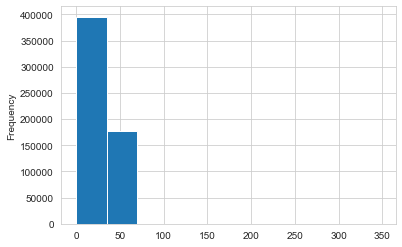

In [30]:
import seaborn as sns
sns.set_style('whitegrid')
df = df_call_record.groupby(['sid'])['ringing_time'].sum().reset_index()
df['ringing_time'].plot(kind='hist')

In [31]:
bins = [0,1, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df_call_record['binned_ring'] = pd.cut(df_call_record['ringing_time'], bins)
df_call_record.binned_ring.value_counts()

(40, 50]    112534
(10, 20]     86945
(1, 10]      77764
(20, 30]     60946
(50, 60]     57144
(30, 40]     18329
(0, 1]         534
(60, 70]         8
(70, 80]         3
(80, 90]         0
Name: binned_ring, dtype: int64

In [32]:
bins = [0,1, 10, 20, 30, 40, 50, 60, 70, 80, 90,100,150,200,250,300,400,500,1000,1500,2000,2500,3000,4000,5000]
df_call_record['binned_duration'] = pd.cut(df_call_record['duration'], bins)
df_call_record.binned_duration.value_counts()

(1, 10]         75134
(10, 20]        25882
(20, 30]        15994
(30, 40]        10175
(40, 50]         5925
(50, 60]         5272
(60, 70]         4419
(0, 1]           2644
(70, 80]         2460
(80, 90]         1450
(100, 150]       1209
(90, 100]         918
(150, 200]        119
(200, 250]         43
(300, 400]         19
(250, 300]         17
(500, 1000]        17
(400, 500]         12
(1000, 1500]        1
(3000, 4000]        1
(1500, 2000]        0
(2000, 2500]        0
(2500, 3000]        0
(4000, 5000]        0
Name: binned_duration, dtype: int64

In [33]:
table = df_call_record.pivot_table(values='sid', index='binned_duration', columns='binned_ring', aggfunc=lambda sid: len(sid.unique()))
table

binned_ring,"(0, 1]","(1, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]"
binned_duration,,,,,,,
"(0, 1]",9.0,493.0,234.0,69.0,5.0,3.0,NaN
"(1, 10]",197.0,35662.0,16679.0,4406.0,219.0,63.0,10.0
"(10, 20]",60.0,13826.0,7305.0,2020.0,84.0,24.0,5.0
"(20, 30]",28.0,8690.0,4880.0,1246.0,50.0,17.0,4.0
"(30, 40]",15.0,5447.0,3289.0,827.0,39.0,6.0,5.0
"(40, 50]",9.0,3143.0,1970.0,512.0,18.0,5.0,1.0
"(50, 60]",10.0,2816.0,1779.0,479.0,25.0,5.0,2.0
"(60, 70]",7.0,2304.0,1541.0,419.0,24.0,7.0,3.0
"(70, 80]",7.0,1330.0,812.0,218.0,13.0,4.0,NaN


In [34]:
df_call_record

,sid,status,phone_no,start_time,ringing_time,duration,caller_id,dail_time,pick_time,end_time,telco_code,telco_text,recording_url,bot_failed,chaturl,call_direction,billing_minutes,company_id,insertedDate,updatedDate,phone_number,hour_of_day,date,day_of_week,date_time,pickup_time_hour_of_the_day,voicebot_triggered,voicebot_connected,binned_ring,binned_duration
0,8ca57ce22d16469792d032954c8e2104,answered,919844481461,2021-09-08T17:33:36.838,0.0,4.0,918068983636,2021-09-08T17:33:36.838,2021-09-08 17:33:36.588,2021-09-08T17:33:39.963,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-09-08T12:03:47.604Z,2021-09-08T12:03:47.604Z,9844481461,17,2021-09-08,2,2021-09-08 17:33:36.838,17.0,1,1,NaN,"(1.0, 10.0]"
1,92ba02ee97464e2c991b225a28de217d,answered,919818381771,2021-09-08T17:33:19.495,6.0,16.0,918068983636,2021-09-08T17:33:19.495,2021-09-08 17:33:28.083,2021-09-08T17:33:43.703,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.772Z,2021-09-08T12:03:47.772Z,9818381771,17,2021-09-08,2,2021-09-08 17:33:19.495,17.0,1,1,"(1.0, 10.0]","(10.0, 20.0]"
2,048c0dc1c6c340d5b5c1d31b5444f8ea,not_answered,919908486774,2021-09-08T17:33:09.688,27.0,0.0,918068983636,2021-09-08T17:33:09.688,NaT,2021-09-08T17:33:39.339,19,"User alerting, no answer",NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:48.432Z,2021-09-08T12:03:48.432Z,9908486774,17,2021-09-08,2,2021-09-08 17:33:09.688,NaN,1,0,"(20.0, 30.0]",NaN
3,23133ea472634710850d5bf8867f6656,not_answered,919311852510,2021-09-08T17:33:12.090,28.0,0.0,918068983636,2021-09-08T17:33:12.090,NaT,2021-09-08T17:33:41.808,17,User busy,NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:47.675Z,2021-09-08T12:03:47.675Z,9311852510,17,2021-09-08,2,2021-09-08 17:33:12.090,NaN,1,0,"(20.0, 30.0]",NaN
4,2918d96bea6149f3b482bda701e6faa4,answered,919991207863,2021-09-08T17:33:09.489,13.0,15.0,918068983636,2021-09-08T17:33:09.489,2021-09-08 17:33:25.127,2021-09-08T17:33:39.872,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.747Z,2021-09-08T12:03:47.747Z,9991207863,17,2021-09-08,2,2021-09-08 17:33:09.489,17.0,1,1,"(10.0, 20.0]","(10.0, 20.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576155,40df08f0390046f48620babac890f8e4,answered,916201901687,2021-12-19T13:25:24.991,0.0,1.0,918068988518,2021-12-19T13:25:24.991,2021-12-19 13:25:24.738,2021-12-19T13:25:25.062,131,Connect Timeout,NaN,True,https://app.yellowmessenger.com/#/public/messa...,inbound,0.0,NaN,2021-12-19T07:55:25.628Z,2021-12-19T07:55:25.628Z,6201901687,13,2021-12-19,6,2021-12-19 13:25:24.991,13.0,1,1,NaN,"(0.0, 1.0]"
576156,f5c0108a116649b997a13b4cd0ae9079,answered,919985221617,2021-12-30T15:52:04.046,3.0,6.0,918068983636,2021-12-30T15:52:04.046,2021-12-30 15:52:09.860,2021-12-30T15:52:15.664,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-12-30T10:22:19.167Z,2021-12-30T10:22:19.167Z,9985221617,15,2021-12-30,3,2021-12-30 15:52:04.046,15.0,1,1,"(1.0, 10.0]","(1.0, 10.0]"
576157,25107195cee041af8048052832449a57,answered,919910224095,2021-12-31T13:47:25.579,0.0,5.0,918068988518,2021-12-31T13:47:25.579,2021-12-31 13:47:25.319,2021-12-31T13:47:30.247,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-12-31T08:17:33.777Z,2021-12-31T08:17:33.778Z,9910224095,13,2021-12-31,4,2021-12-31 13:47:25.579,13.0,1,1,NaN,"(1.0, 10.0]"
576158,d8f7fa9a6ac24c9eb4199b624c212ffe,answered,919959248941,2022-01-01T12:54:

In [35]:
df_call_record.drop(['caller_id', 'dail_time','binned_ring','binned_duration','telco_code','telco_text','recording_url','bot_failed','chaturl','call_direction','billing_minutes','company_id','insertedDate','updatedDate','date_time'], axis = 1)

,sid,status,phone_no,start_time,ringing_time,duration,pick_time,end_time,phone_number,hour_of_day,date,day_of_week,pickup_time_hour_of_the_day,voicebot_triggered,voicebot_connected
0,8ca57ce22d16469792d032954c8e2104,answered,919844481461,2021-09-08T17:33:36.838,0.0,4.0,2021-09-08 17:33:36.588,2021-09-08T17:33:39.963,9844481461,17,2021-09-08,2,17.0,1,1
1,92ba02ee97464e2c991b225a28de217d,answered,919818381771,2021-09-08T17:33:19.495,6.0,16.0,2021-09-08 17:33:28.083,2021-09-08T17:33:43.703,9818381771,17,2021-09-08,2,17.0,1,1
2,048c0dc1c6c340d5b5c1d31b5444f8ea,not_answered,919908486774,2021-09-08T17:33:09.688,27.0,0.0,NaT,2021-09-08T17:33:39.339,9908486774,17,2021-09-08,2,NaN,1,0
3,23133ea472634710850d5bf8867f6656,not_answered,919311852510,2021-09-08T17:33:12.090,28.0,0.0,NaT,2021-09-08T17:33:41.808,9311852510,17,2021-09-08,2,NaN,1,0
4,2918d96bea6149f3b482bda701e6faa4,answered,919991207863,2021-09-08T17:33:09.489,13.0,15.0,2021-09-08 17:33:25.127,2021-09-08T17:33:39.872,9991207863,17,2021-09-08,2,17.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576155,40df08f0390046f48620babac890f8e4,answered,916201901687,2021-12-19T13:25:24.991,0.0,1.0,2021-12-19 13:25:24.738,2021-12-19T13:25:25.062,6201901687,13,2021-12-19,6,13.0,1,1
576156,f5c0108a116649b997a13b4cd0ae9079,answered,919985221617,2021-12-30T15:52:04.046,3.0,6.0,2021-12-30 15:52:09.860,2021-12-30T15:52:15.664,9985221617,15,2021-12-30,3,15.0,1,1
576157,25107195cee041af8048052832449a57,answered,919910224095,2021-12-31T13:47:25.579,0.0,5.0,2021-12-31 13:47:25.319,2021-12-31T13:47:30.247,9910224095,13,2021-12-31,4,13.0,1,1
576158,d8f7fa9a6ac24c9eb4199b624c212ffe,answered,919959248941,2022-01-01T12:54:32.469,0.0,5.0,2022-01-01 12:54:32.219,2022-01-01T12:54:36.675,9959248941,12,2022-01-01,5,12.0,1,1


# Whatsapp

In [36]:
df_whatsapp

,CampaignId,BotId,UserId,User Details,Template ID,Channel,Sender ID,Status,Comments,Sent Time,Delivered Time,Read Time,Scheduled Time
0,6141c8040c0acc1b27447646,x1627042829969,917727943138,"{""name"":""Bijendra sahni"",""tags"":[""15.09 BUCKET...",payment_link1,whatsapp,917483023019,failed,UTA -- - User is Invalid,"September 15, 2021 5:52 PM",NaN,NaN,"September 15, 2021 5:52 PM"
1,6141c8040c0acc1b27447646,x1627042829969,917009518545,"{""name"":""Jagandeep Singh"",""tags"":[""15.09 BUCKE...",payment_link1,whatsapp,917483023019,read,"UTA -- {""id"":""gBEGkXAJUYVFAgmgQcR_1mx-Sz8"",""re...","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM","September 15, 2021 6:24 PM","September 15, 2021 5:52 PM"
2,6141c8040c0acc1b27447646,x1627042829969,917550806779,"{""name"":""HALEMA BIBI"",""tags"":[""15.09 BUCKET X....",payment_link1,whatsapp,917483023019,failed,UTA -- - User is Invalid,"September 15, 2021 5:52 PM",NaN,NaN,"September 15, 2021 5:52 PM"
3,6141c8040c0acc1b27447646,x1627042829969,917013900320,"{""name"":""Davarasingi suseela"",""tags"":[""15.09 B...",payment_link1,whatsapp,917483023019,read,"UTA -- {""id"":""gBEGkXATkAMgAglxv6q36vjMfYc"",""re...","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM"
4,6141c8040c0acc1b27447646,x1627042829969,919999890893,"{""name"":""Tushar Tyagi"",""tags"":[""15.09 BUCKET X...",payment_link1,whatsapp,917483023019,read,"UTA -- {""id"":""gBEGkZmZiQiTAgkFwW4C36GK4YE"",""re...","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM","September 15, 2021 7:36 PM","September 15, 2021 5:52 PM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16240,6141c8040c0acc1b27447646,x1627042829969,918894851808,"{""name"":""davinder kumar"",""tags"":[""15.09 BUCKET...",payment_link1,whatsapp,917483023019,failed,"UTA -- {""errors"":[{""code"":471,""href"":""https://...","September 15, 2021 6:12 PM",NaN,NaN,"September 15, 2021 5:52 PM"
16241,6141c8040c0acc1b27447646,x1627042829969,919338909779,"{""name"":""Ronak Mohanty"",""tags"":[""15.09 BUCKET ...",payment_link1,whatsapp,917483023019,failed,"UTA -- {""errors"":[{""code"":471,""href"":""https://...","September 15, 2021 6:12 PM",NaN,NaN,"September 15, 2021 5:52 PM"
16242,6141c8040c0acc1b27447646,x1627042829969,919927448987,"{""name"":""Deshraj Singh"",""tags"":[""15.09 BUCKET ...",payment_link1,whatsapp,917483023019,failed,"UTA -- {""errors"":[{""code"":471,""href"":""https://...","September 15, 2021 6:12 PM",NaN,NaN,"September 15, 2021 5:52 PM"
16243,6141c8040c0acc1b27447646,x1627042829969,919538317127,"{""name"":""Winston Louis Martis"",""tags"":[""15.09 ...",payment_link1,whatsapp,917483023019,failed,"UTA -- {""errors"":[{""code"":471,""href"":""https://...","September 15, 2021 6:12 PM",NaN,NaN,"September 15, 2021 5:52 PM"


In [37]:
import json

In [38]:
def clean_json(x):
    "Create apply function for decoding JSON"
    return json.loads(x)

In [39]:
df_whatsapp['User_Details'] = df_whatsapp['User Details'].apply(clean_json)
user_details = df_whatsapp['User_Details'].values.tolist()
df_whatsapp_details = pd.json_normalize(user_details)
df_whatsapp_new = pd.concat([df_whatsapp.reset_index(),df_whatsapp_details],axis=1)
df_whatsapp_new['phone_number']= df_whatsapp_new['number'].apply(lambda x: int(str(x)[-10:]))
df_whatsapp_new = df_whatsapp_new.rename(columns={'UserId': 'Phone'})
df_whatsapp_new.head()


,index,CampaignId,BotId,Phone,User Details,Template ID,Channel,Sender ID,Status,Comments,Sent Time,Delivered Time,Read Time,Scheduled Time,User_Details,name,tags,number,bot_name,company_name,company_id,customer_id,date_of_default,transaction_id,loan_merchant_name,due_amounts,manual_payment_link,helpline_number,audienceId,phone_number
0,0,6141c8040c0acc1b27447646,x1627042829969,917727943138,"{""name"":""Bijendra sahni"",""tags"":[""15.09 BUCKET...",payment_link1,whatsapp,917483023019,failed,UTA -- - User is Invalid,"September 15, 2021 5:52 PM",NaN,NaN,"September 15, 2021 5:52 PM","{'name': 'Bijendra sahni', 'tags': ['15.09 BUC...",Bijendra sahni,[15.09 BUCKET X.W ZM],917727943138,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,670768019,2021-09-06,D32A15B9EA21,NorthernArc,1161,"""https://rzp.io/i/Wds77JUT8b""",7509639000,60fab66f6dfe71538b0a8e17,7727943138
1,1,6141c8040c0acc1b27447646,x1627042829969,917009518545,"{""name"":""Jagandeep Singh"",""tags"":[""15.09 BUCKE...",payment_link1,whatsapp,917483023019,read,"UTA -- {""id"":""gBEGkXAJUYVFAgmgQcR_1mx-Sz8"",""re...","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM","September 15, 2021 6:24 PM","September 15, 2021 5:52 PM","{'name': 'Jagandeep Singh', 'tags': ['15.09 BU...",Jagandeep Singh,[15.09 BUCKET X.W ZM],917009518545,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,226474000,2021-09-06,FD46F60079F6,Hedge Finance,2479,"""https://rzp.io/i/AbHSLtBdr7""",7509639000,60fab66f6dfe71538b0a8e17,7009518545
2,2,6141c8040c0acc1b27447646,x1627042829969,917550806779,"{""name"":""HALEMA BIBI"",""tags"":[""15.09 BUCKET X....",payment_link1,whatsapp,917483023019,failed,UTA -- - User is Invalid,"September 15, 2021 5:52 PM",NaN,NaN,"September 15, 2021 5:52 PM","{'name': 'HALEMA BIBI', 'tags': ['15.09 BUCKET...",HALEMA BIBI,[15.09 BUCKET X.W ZM],917550806779,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,744271854,2021-09-06,801275F5F9AF,DMI,2225,"""https://rzp.io/i/n2yKXWD""",7509639000,60fab66f6dfe71538b0a8e17,7550806779
3,3,6141c8040c0acc1b27447646,x1627042829969,917013900320,"{""name"":""Davarasingi suseela"",""tags"":[""15.09 B...",payment_link1,whatsapp,917483023019,read,"UTA -- {""id"":""gBEGkXATkAMgAglxv6q36vjMfYc"",""re...","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM","{'name': 'Davarasingi suseela', 'tags': ['15.0...",Davarasingi suseela,[15.09 BUCKET X.W ZM],917013900320,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,069726894,2021-09-06,00D94F83101D,IIFL,1598,"""https://rzp.io/i/xG0Oah2G""",7509639000,60fab66f6dfe71538b0a8e17,7013900320
4,4,6141c8040c0acc1b27447646,x1627042829969,919999890893,"{""name"":""Tushar Tyagi"",""tags"":[""15.09 BUCKET X...",payment_link1,whatsapp,917483023019,read,"UTA -- {""id"":""gBEGkZmZiQiTAgkFwW4C36GK4YE"",""re...","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM","September 15, 2021 7:36 PM","September 15, 2021 5:52 PM","{'name': 'Tushar Tyagi', 'tags': ['15.09 BUCKE...",Tushar Tyagi,[15.09 BUCKET X.W ZM],919999890893,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,203859720,2021-09-06,54AFA3353305,Incred,351,"""https://rzp.io/i/Ok2FtbfiV""",7509639000,60fab66f6dfe71538b0a8e17,9999890893


In [40]:
df_whatsapp_new = df_whatsapp_new.rename(columns={'Read Time': 'Read_Time'})

In [41]:
df_whatsapp_new['wa_triggered'] = df_whatsapp_new['CampaignId'].apply(lambda x: '1' if x != '' else '0')

In [42]:
df_whatsapp_new['wa_delivered'] = df_whatsapp_new['Status'].apply(lambda x: '1' if x == 'delivered' else '0')

In [43]:
df_whatsapp_new['wa_read'] = df_whatsapp_new['Status'].apply(lambda x: '1' if x == 'read' else '0')

In [44]:
df_whatsapp_new['Read_Time'] = pd.to_datetime(df_whatsapp_new['Read_Time'],errors='coerce')

In [45]:
df_whatsapp_new['hour_of_day'] = pd.to_datetime(df_whatsapp_new.Read_Time).dt.hour
df_whatsapp_new['date'] = pd.to_datetime(df_whatsapp_new.Read_Time).dt.date
df_whatsapp_new['dow_wa_read_time'] = pd.to_datetime(df_whatsapp_new.Read_Time).dt.dayofweek
df_whatsapp_new['dom_wa_read_time'] = pd.to_datetime(df_whatsapp_new.Read_Time).dt.day

In [46]:
df_whatsapp_new.head()

,index,CampaignId,BotId,Phone,User Details,Template ID,Channel,Sender ID,Status,Comments,Sent Time,Delivered Time,Read_Time,Scheduled Time,User_Details,name,tags,number,bot_name,company_name,company_id,customer_id,date_of_default,transaction_id,loan_merchant_name,due_amounts,manual_payment_link,helpline_number,audienceId,phone_number,wa_triggered,wa_delivered,wa_read,hour_of_day,date,dow_wa_read_time,dom_wa_read_time
0,0,6141c8040c0acc1b27447646,x1627042829969,917727943138,"{""name"":""Bijendra sahni"",""tags"":[""15.09 BUCKET...",payment_link1,whatsapp,917483023019,failed,UTA -- - User is Invalid,"September 15, 2021 5:52 PM",NaN,NaT,"September 15, 2021 5:52 PM","{'name': 'Bijendra sahni', 'tags': ['15.09 BUC...",Bijendra sahni,[15.09 BUCKET X.W ZM],917727943138,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,670768019,2021-09-06,D32A15B9EA21,NorthernArc,1161,"""https://rzp.io/i/Wds77JUT8b""",7509639000,60fab66f6dfe71538b0a8e17,7727943138,1,0,0,NaN,NaT,NaN,NaN
1,1,6141c8040c0acc1b27447646,x1627042829969,917009518545,"{""name"":""Jagandeep Singh"",""tags"":[""15.09 BUCKE...",payment_link1,whatsapp,917483023019,read,"UTA -- {""id"":""gBEGkXAJUYVFAgmgQcR_1mx-Sz8"",""re...","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM",2021-09-15 18:24:00,"September 15, 2021 5:52 PM","{'name': 'Jagandeep Singh', 'tags': ['15.09 BU...",Jagandeep Singh,[15.09 BUCKET X.W ZM],917009518545,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,226474000,2021-09-06,FD46F60079F6,Hedge Finance,2479,"""https://rzp.io/i/AbHSLtBdr7""",7509639000,60fab66f6dfe71538b0a8e17,7009518545,1,0,1,18.0,2021-09-15,2.0,15.0
2,2,6141c8040c0acc1b27447646,x1627042829969,917550806779,"{""name"":""HALEMA BIBI"",""tags"":[""15.09 BUCKET X....",payment_link1,whatsapp,917483023019,failed,UTA -- - User is Invalid,"September 15, 2021 5:52 PM",NaN,NaT,"September 15, 2021 5:52 PM","{'name': 'HALEMA BIBI', 'tags': ['15.09 BUCKET...",HALEMA BIBI,[15.09 BUCKET X.W ZM],917550806779,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,744271854,2021-09-06,801275F5F9AF,DMI,2225,"""https://rzp.io/i/n2yKXWD""",7509639000,60fab66f6dfe71538b0a8e17,7550806779,1,0,0,NaN,NaT,NaN,NaN
3,3,6141c8040c0acc1b27447646,x1627042829969,917013900320,"{""name"":""Davarasingi suseela"",""tags"":[""15.09 B...",payment_link1,whatsapp,917483023019,read,"UTA -- {""id"":""gBEGkXATkAMgAglxv6q36vjMfYc"",""re...","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM",2021-09-15 17:52:00,"September 15, 2021 5:52 PM","{'name': 'Davarasingi suseela', 'tags': ['15.0...",Davarasingi suseela,[15.09 BUCKET X.W ZM],917013900320,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,069726894,2021-09-06,00D94F83101D,IIFL,1598,"""https://rzp.io/i/xG0Oah2G""",7509639000,60fab66f6dfe71538b0a8e17,7013900320,1,0,1,17.0,2021-09-15,2.0,15.0
4,4,6141c8040c0acc1b27447646,x1627042829969,919999890893,"{""name"":""Tushar Tyagi"",""tags"":[""15.09 BUCKET X...",payment_link1,whatsapp,917483023019,read,"UTA -- {""id"":""gBEGkZmZiQiTAgkFwW4C36GK4YE"",""re...","September 15, 2021 5:52 PM","September 15, 2021 5:52 PM",2021-09-15 19:36:00,"September 15, 2021 5:52 PM","{'name': 'Tushar Tyagi', 'tags': ['15.09 BUCKE...",Tushar Tyagi,[15.09 BUCKET X.W ZM],919999890893,Ria,Zestmoney,f30dcf9d-d0b9-422a-ae30-f426165a65ab,203859720,2021-09-06,54AFA3353305,Incred,351,"""https://rzp.io/i/Ok2FtbfiV""",7509639000,60fab66f6dfe71538b0a8e17,9999890893,1,0,1,19.0,2021-09-15,2.0,15.0


In [52]:
#df_whatsapp_new = df_whatsapp_new[[1,2,3,6,7,11,29,30,31,32,33,34,35,3620,21,22,23,24,25,26]]
df_whatsapp_new1 = df_whatsapp_new.drop(df_whatsapp_new.columns[[0,4,5,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26]], axis=1) 
#df_whatsapp_new.drop(df_whatsapp_new.columns[[0,1,3]], axis=1, inplace=True)
df_whatsapp_new1


,CampaignId,BotId,Phone,Channel,Sender ID,Delivered Time,Read_Time,helpline_number,audienceId,phone_number,wa_triggered,wa_delivered,wa_read,hour_of_day,date,dow_wa_read_time,dom_wa_read_time
0,6141c8040c0acc1b27447646,x1627042829969,917727943138,whatsapp,917483023019,NaN,NaT,7509639000,60fab66f6dfe71538b0a8e17,7727943138,1,0,0,NaN,NaT,NaN,NaN
1,6141c8040c0acc1b27447646,x1627042829969,917009518545,whatsapp,917483023019,"September 15, 2021 5:52 PM",2021-09-15 18:24:00,7509639000,60fab66f6dfe71538b0a8e17,7009518545,1,0,1,18.0,2021-09-15,2.0,15.0
2,6141c8040c0acc1b27447646,x1627042829969,917550806779,whatsapp,917483023019,NaN,NaT,7509639000,60fab66f6dfe71538b0a8e17,7550806779,1,0,0,NaN,NaT,NaN,NaN
3,6141c8040c0acc1b27447646,x1627042829969,917013900320,whatsapp,917483023019,"September 15, 2021 5:52 PM",2021-09-15 17:52:00,7509639000,60fab66f6dfe71538b0a8e17,7013900320,1,0,1,17.0,2021-09-15,2.0,15.0
4,6141c8040c0acc1b27447646,x1627042829969,919999890893,whatsapp,917483023019,"September 15, 2021 5:52 PM",2021-09-15 19:36:00,7509639000,60fab66f6dfe71538b0a8e17,9999890893,1,0,1,19.0,2021-09-15,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16240,6141c8040c0acc1b27447646,x1627042829969,918894851808,whatsapp,917483023019,NaN,NaT,7509639000,60fab66f6dfe71538b0a8e17,8894851808,1,0,0,NaN,NaT,NaN,NaN
16241,6141c8040c0acc1b27447646,x1627042829969,919338909779,whatsapp,917483023019,NaN,NaT,7509639000,60fab66f6dfe71538b0a8e17,9338909779,1,0,0,NaN,NaT,NaN,NaN
16242,6141c8040c0acc1b27447646,x1627042829969,919927448987,whatsapp,917483023019,NaN,NaT,7509639000,60fab66f6dfe71538b0a8e17,9927448987,1,0,0,NaN,NaT,NaN,NaN
16243,6141c8040c0acc1b27447646,x1627042829969,919538317127,whatsapp,917483023019,NaN,NaT,7509639000,60fab66f6dfe71538b0a8e17,9538317127,1,0,0,NaN,NaT,NaN,NaN


In [53]:
df_call_record

,sid,status,phone_no,start_time,ringing_time,duration,caller_id,dail_time,pick_time,end_time,telco_code,telco_text,recording_url,bot_failed,chaturl,call_direction,billing_minutes,company_id,insertedDate,updatedDate,phone_number,hour_of_day,date,day_of_week,date_time,pickup_time_hour_of_the_day,voicebot_triggered,voicebot_connected,binned_ring,binned_duration
0,8ca57ce22d16469792d032954c8e2104,answered,919844481461,2021-09-08T17:33:36.838,0.0,4.0,918068983636,2021-09-08T17:33:36.838,2021-09-08 17:33:36.588,2021-09-08T17:33:39.963,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-09-08T12:03:47.604Z,2021-09-08T12:03:47.604Z,9844481461,17,2021-09-08,2,2021-09-08 17:33:36.838,17.0,1,1,NaN,"(1.0, 10.0]"
1,92ba02ee97464e2c991b225a28de217d,answered,919818381771,2021-09-08T17:33:19.495,6.0,16.0,918068983636,2021-09-08T17:33:19.495,2021-09-08 17:33:28.083,2021-09-08T17:33:43.703,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.772Z,2021-09-08T12:03:47.772Z,9818381771,17,2021-09-08,2,2021-09-08 17:33:19.495,17.0,1,1,"(1.0, 10.0]","(10.0, 20.0]"
2,048c0dc1c6c340d5b5c1d31b5444f8ea,not_answered,919908486774,2021-09-08T17:33:09.688,27.0,0.0,918068983636,2021-09-08T17:33:09.688,NaT,2021-09-08T17:33:39.339,19,"User alerting, no answer",NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:48.432Z,2021-09-08T12:03:48.432Z,9908486774,17,2021-09-08,2,2021-09-08 17:33:09.688,NaN,1,0,"(20.0, 30.0]",NaN
3,23133ea472634710850d5bf8867f6656,not_answered,919311852510,2021-09-08T17:33:12.090,28.0,0.0,918068983636,2021-09-08T17:33:12.090,NaT,2021-09-08T17:33:41.808,17,User busy,NaN,False,https://app.yellowmessenger.com/#/public/messa...,outbound,0.0,NaN,2021-09-08T12:03:47.675Z,2021-09-08T12:03:47.675Z,9311852510,17,2021-09-08,2,2021-09-08 17:33:12.090,NaN,1,0,"(20.0, 30.0]",NaN
4,2918d96bea6149f3b482bda701e6faa4,answered,919991207863,2021-09-08T17:33:09.489,13.0,15.0,918068983636,2021-09-08T17:33:09.489,2021-09-08 17:33:25.127,2021-09-08T17:33:39.872,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-09-08T12:03:47.747Z,2021-09-08T12:03:47.747Z,9991207863,17,2021-09-08,2,2021-09-08 17:33:09.489,17.0,1,1,"(10.0, 20.0]","(10.0, 20.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576155,40df08f0390046f48620babac890f8e4,answered,916201901687,2021-12-19T13:25:24.991,0.0,1.0,918068988518,2021-12-19T13:25:24.991,2021-12-19 13:25:24.738,2021-12-19T13:25:25.062,131,Connect Timeout,NaN,True,https://app.yellowmessenger.com/#/public/messa...,inbound,0.0,NaN,2021-12-19T07:55:25.628Z,2021-12-19T07:55:25.628Z,6201901687,13,2021-12-19,6,2021-12-19 13:25:24.991,13.0,1,1,NaN,"(0.0, 1.0]"
576156,f5c0108a116649b997a13b4cd0ae9079,answered,919985221617,2021-12-30T15:52:04.046,3.0,6.0,918068983636,2021-12-30T15:52:04.046,2021-12-30 15:52:09.860,2021-12-30T15:52:15.664,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,outbound,1.0,NaN,2021-12-30T10:22:19.167Z,2021-12-30T10:22:19.167Z,9985221617,15,2021-12-30,3,2021-12-30 15:52:04.046,15.0,1,1,"(1.0, 10.0]","(1.0, 10.0]"
576157,25107195cee041af8048052832449a57,answered,919910224095,2021-12-31T13:47:25.579,0.0,5.0,918068988518,2021-12-31T13:47:25.579,2021-12-31 13:47:25.319,2021-12-31T13:47:30.247,16,Normal Clearing,https://yellowmessenger.blob.core.windows.net/...,False,https://app.yellowmessenger.com/#/public/messa...,inbound,1.0,NaN,2021-12-31T08:17:33.777Z,2021-12-31T08:17:33.778Z,9910224095,13,2021-12-31,4,2021-12-31 13:47:25.579,13.0,1,1,NaN,"(1.0, 10.0]"
576158,d8f7fa9a6ac24c9eb4199b624c212ffe,answered,919959248941,2022-01-01T12:54:

In [ ]:
df_manual_call = pd.read_excel('/Users/AarshDayal/Downloads/Zest Bucket X Master.xlsx')
df_manual_call 